# Real-Time MNIST Digit Classification

## By: Mustafa Yildirim

Importing Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Processing the Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
unique = np.unique(y_train)
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
indices = [np.where(y_train == digit)[0][0] for digit in unique]
indices

[1, 3, 5, 7, 2, 0, 13, 15, 17, 4]

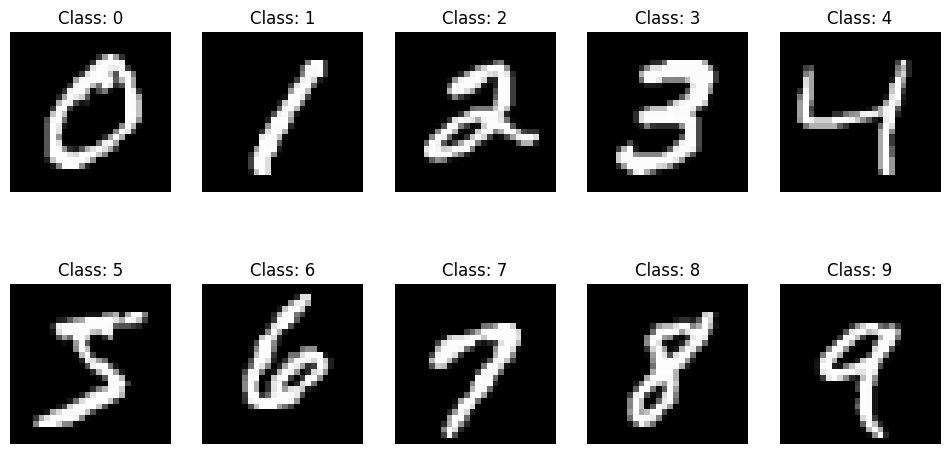

In [5]:
plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f'Class: {y_train[idx]}')
    plt.axis('off')
plt.show()

In [6]:
def data_process(x):
    x = x/255.0
    x = x.reshape(-1, 28, 28, 1)
    return x

In [7]:
x_train = data_process(x_train)
x_test = data_process(x_test)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

Initializing the Model

In [9]:
class CNNModel(models.Sequential):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.add(layers.Input(shape=(28, 28, 1)))
        self.add(layers.Conv2D(32, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D((2, 2)))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D((2, 2)))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(10, activation='softmax'))
        
    def forward(self, x):
        return self.call(x)

In [10]:
model = CNNModel()
model.summary()

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training

In [12]:
History = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8579 - loss: 0.4506
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9747 - loss: 0.0873
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9820 - loss: 0.0578
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9863 - loss: 0.0489
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9884 - loss: 0.0377
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0314
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9914 - loss: 0.0284
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.0234
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9934 - loss: 0.0204
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9937 - loss: 0.0194


In [13]:
train_acc, train_loss = History.history['accuracy'], History.history['loss']

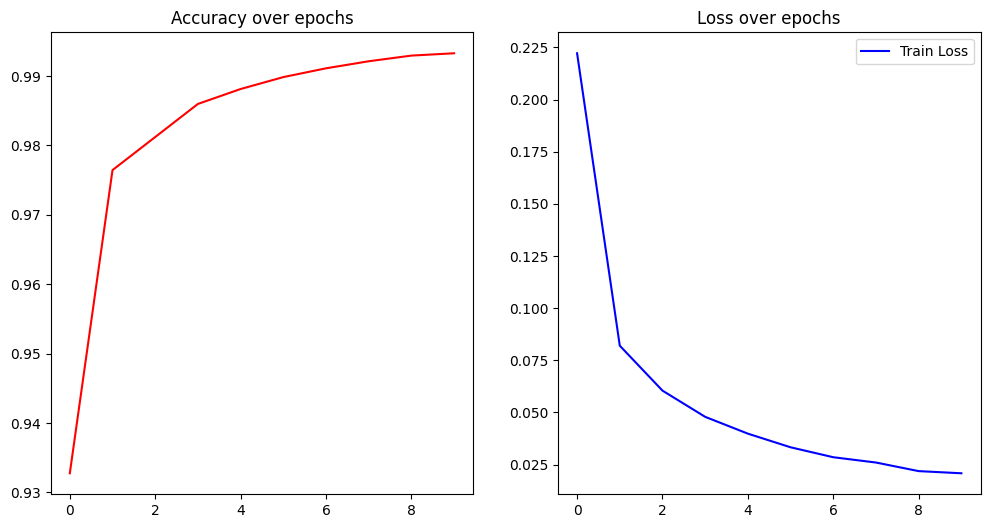

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Accuracy over epochs')
plt.plot(train_acc, label='Train Accuracy', color='red')

plt.subplot(1, 2, 2)
plt.title('Loss over epochs')
plt.plot(train_loss, label='Train Loss', color='blue')

plt.legend()
plt.show()

Testing

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0285


Canvas that allows for real-time digit classification

In [16]:
canvas = np.zeros((400, 400), dtype=np.uint8)
drawing = False

def draw(event, x, y, flags, param):
    global drawing
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            cv.circle(canvas, (x, y), 5, (255, 255, 255), -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False

In [17]:
cap = cv.VideoCapture(0)
cv.namedWindow('Canvas')
cv.setMouseCallback('Canvas', draw)

while True:
    cv.imshow('Canvas', canvas)

    key = cv.waitKey(1) & 0xFF
    
    if key == ord('p'):
        img = cv.resize(canvas, (28, 28))
        img = img/255.0
        img = img.reshape(1, 28, 28, 1)
        
        prediction = model.predict(img)
        digit = np.argmax(prediction)
        
        print(f'Predicted digit: {digit}')
        
        cv.putText(canvas, str(digit), (10, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    if key == ord('c'):
        canvas = np.zeros((400, 400), dtype=np.uint8)
        
    if key == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted digit: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted digit: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted digit: 5
